# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Elvino Junior
- **Email:** elvinojunior75@gmail.com
- **ID Dicoding:** elvinojr75

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?
- Apakah ada pola penggunaan sepeda berdasarkan hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/elvinojunior/dicoding_proyek_analisis_data/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/elvinojunior/dicoding_proyek_analisis_data/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dengan menggunakan code **pd.read_csv** kita dapat membaca file csv dengan menggunakan library pandas
- dengan menggunakan code **.head()** kita dapat menampilkan 5 isi paling awal dari dataset yang kita tentukan sebelumnya.

### Assessing Data

In [5]:
print("jumlah duplikasi: ", day_df.duplicated().sum())
print("jumlah duplikasi: ", hour_df.duplicated().sum())

jumlah duplikasi:  0
jumlah duplikasi:  0


In [6]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- terlihat di column [dteday] tipe data object, kita harus ubah ke datetime
- tidak terjadi duplikasi data pada dataset, dan terlihat tidak ada yang nilai yang aneh melalui code **.describe()**

### Cleaning Data

In [8]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- **pd.to_datetime(hour_df['dteday'])** berfungsi untuk merubah tipe data kolom dteday menjadi tipe data datetime dengan menggunakan library pandas
- **.info()** untuk menampilkan informasi seputar dataset yang dikerjakan

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
hour_df.groupby(by="dteday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
              max min       mean        std        max min        mean   
dteday                                                                   
2011-01-01     47   0  13.791667  14.455266         71   0   27.250000   
2011-01-02     20   0   5.695652   6.255432         73   1   29.130435   
2011-01-03     14   0   5.454545   5.040099        153   1   55.863636   
2011-01-04     18   0   4.695652   5.880900        202   1   63.217391   
2011-01-05     12   0   3.565217   3.368653        192   2   66.000000   
...           ...  ..        ...        ...        ...  ..         ...   
2012-12-27     31   0  10.291667  10.564416        227   1   77.791667   
2012-12-28     84   0  26.833333  31.133187        238   2  102.125000   
2012-12-29     22   0   6.625000   6.638573        125   3   49.250000   
2012-12-30     49   0  15.166667  16.672463        121   2   59.666667   
2012-12-31     69   0  18.291667  20.556347        246   1   95.416667   

                       
                  std  
dteday                 
2011-01-01  21.303705  
2011-01-02  24.589917  
2011-01-03  46.424845  
2011-01-04  58.165091  
2011-01-05  57.419509  
...               ...  
2012-12-27  65.949242  
2012-12-28  76.071655  
2012-12-29  36.582545  
2012-12-30  41.028799  
2012-12-31  71.236237  

[731 rows x 8 columns]

In [16]:
day_df.groupby(by="dteday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ]
})

casual                 registered                  
              max  min   mean std        max   min    mean std
dteday                                                        
2011-01-01    331  331  331.0 NaN        654   654   654.0 NaN
2011-01-02    131  131  131.0 NaN        670   670   670.0 NaN
2011-01-03    120  120  120.0 NaN       1229  1229  1229.0 NaN
2011-01-04    108  108  108.0 NaN       1454  1454  1454.0 NaN
2011-01-05     82   82   82.0 NaN       1518  1518  1518.0 NaN
...           ...  ...    ...  ..        ...   ...     ...  ..
2012-12-27    247  247  247.0 NaN       1867  1867  1867.0 NaN
2012-12-28    644  644  644.0 NaN       2451  2451  2451.0 NaN
2012-12-29    159  159  159.0 NaN       1182  1182  1182.0 NaN
2012-12-30    364  364  364.0 NaN       1432  1432  1432.0 NaN
2012-12-31    439  439  439.0 NaN       2290  2290  2290.0 NaN

[731 rows x 8 columns]

In [15]:
day_df.groupby(by="holiday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ]
})

casual                               registered                    \
           max  min         mean         std        max  min         mean   
holiday                                                                     
0         3410    2   841.771831  680.528529       6946   20  3685.332394   
1         3065  117  1064.714286  860.046809       5172  573  2670.285714   

                      
                 std  
holiday               
0        1553.704431  
1        1492.860246

**Insight:**
- **hour_df.groupby(by="dteday")** dan **day_df.groupby(by="dteday")** berfungsi untuk melihat jumlah sewa berdasarkan tanggal
- **day_df.groupby(by="holiday")** untuk melihat berapa jarak perbedaan antara hari kerja dengan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?

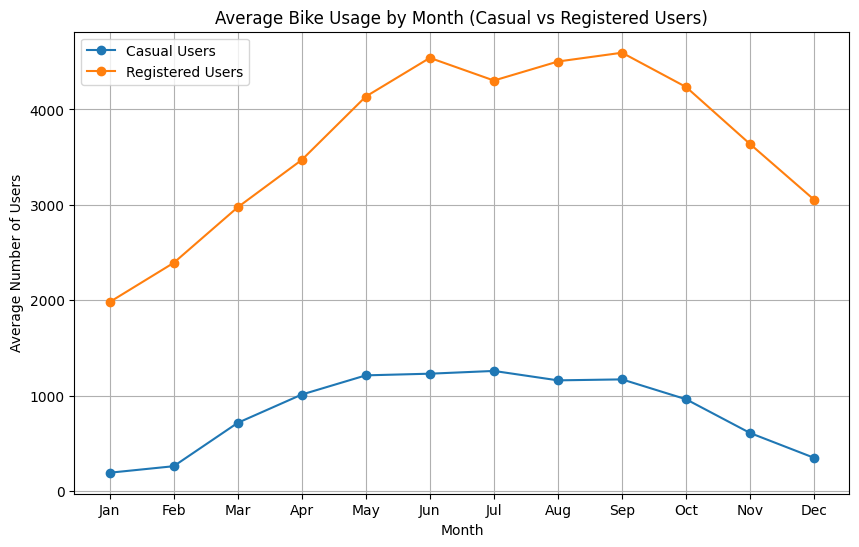

In [21]:
day_df['month'] = day_df['dteday'].dt.month
avg_usage_by_month = day_df.groupby('month')[['casual', 'registered']].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_usage_by_month.index, avg_usage_by_month['casual'], label='Casual Users', marker='o')
plt.plot(avg_usage_by_month.index, avg_usage_by_month['registered'], label='Registered Users', marker='o')
plt.title('Average Bike Usage by Month (Casual vs Registered Users)')
plt.xlabel('Month')
plt.ylabel('Average Number of Users')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah ada pola penggunaan sepeda berdasarkan hari kerja dan hari libur?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


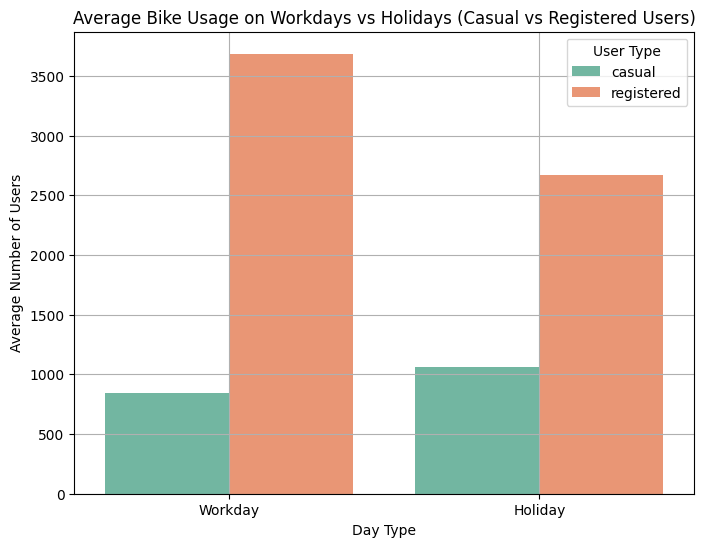

In [34]:
avg_usage_by_holiday = day_df.groupby('holiday')[['casual', 'registered']].mean().reset_index()
avg_usage_by_holiday['holiday'] = avg_usage_by_holiday['holiday'].map({0: 'Workday', 1: 'Holiday'})

avg_usage_by_holiday_melted = avg_usage_by_holiday.melt(id_vars='holiday', value_vars=['casual', 'registered'], var_name='User Type', value_name='Average Users')

plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='Average Users', hue='User Type', data=avg_usage_by_holiday_melted, palette='Set2')
plt.title('Average Bike Usage on Workdays vs Holidays (Casual vs Registered Users)')
plt.xlabel('Day Type')
plt.ylabel('Average Number of Users')
plt.grid(True)
plt.show()

**Insight:**
- terlihat pada line chart bahwa penyewa casual(tidak terdaftar) dengan penyewa terdaftar memiliki gap(jarak) yang sangat berjauhan
- terlihat pada bar plot bahwa penyewa casual pada hari libur jauh lebih banyak dibanding penyewa casual di hari kerja, dan sebaliknya untuk penyewa terdaftar jauh lebih banyak di hari kerja dan lebih sedikir di hari libur

## Analisis Lanjutan (Opsional)

In [36]:
day_df.to_csv("day_df.csv", index=False)

## Conclusion

- terdapat gap signifikan antara jumlah penyewa sepeda casual(tidak terdaftar) dan penyewa terdaftar. Hal ini menunjukkan bahwa pengguna terdaftar cenderung menggunakan layanan sepeda secara lebih konsisten, mungkin karena mereka memiliki akses lebih mudah dan dapat menikmati diskon layanan
- penyewa casual jauh lebih banyak pada hari libur dibandingkan dengan hari kerja yang artinya bahwa pengguna casual lebih cenderung menggunakan sepeda untuk aktivitas rekreasi atau sosial saat mereka tidak bekerja.
sebaliknya, penyewa terdaftar jauh lebih banyak pada hari kerja dibandingkan dengan hari libur. Hal ini menunjukkan bahwa pengguna terdaftar mungkin lebih banyak menggunakan sepeda sebagai moda transportasi harian untuk pergi ke tempat kerja atau aktivitas rutin lainnya